<a href="https://colab.research.google.com/github/Blockchain-Framework/bitcoin-anomaly-analysis/blob/develop/Notebooks/Bitcoin_Anomaly_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imbalanced-learn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold, RFECV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [4]:
original_feature_names = ['input_transaction_count', 'output_transaction_count',
       'input_value_mean', 'input_value_median', 'input_value_maximum',
       'input_value_minimum', 'input_value_25th_percentile',
       'input_value_75th_percentile', 'input_value_range',
       'input_spending_value_usd_mean', 'input_spending_value_usd_median',
       'input_spending_value_usd_maximum', 'input_spending_value_usd_minimum',
       'input_spending_value_usd_25th_percentile',
       'input_spending_value_usd_75th_percentile',
       'input_spending_value_usd_range', 'input_time_diff_mean',
       'input_time_diff_median', 'input_time_diff_maximum',
       'input_time_diff_minimum', 'input_time_diff_25th_percentile',
       'input_time_diff_75th_percentile', 'input_time_diff_range',
       'output_value_usd_mean', 'output_value_usd_median',
       'output_value_usd_maximum', 'output_value_usd_minimum',
       'output_value_usd_25th_percentile', 'output_value_usd_75th_percentile',
       'output_value_usd_range', 'output_time_diff_mean',
       'output_time_diff_median', 'output_time_diff_maximum',
       'output_time_diff_minimum', 'output_time_diff_25th_percentile',
       'output_time_diff_75th_percentile', 'output_time_diff_range',
       'output_value_mean', 'output_value_median', 'output_value_maximum',
       'output_value_minimum', 'output_value_25th_percentile',
       'output_value_75th_percentile', 'output_value_range',
       'input_output_mean_ratio', 'input_output_max_ratio',
       'input_output_min_ratio', 'input_output_percentile_25_diff',
       'input_output_percentile_75_diff', 'range_mean_ratio_input',
       'range_mean_ratio_output', 'input_output_usd_mean_ratio',
       'input_output_usd_max_ratio', 'input_output_usd_min_ratio',
       'input_output_usd_percentile_25_diff',
       'input_output_usd_percentile_75_diff', 'input_range_mean_ratio',
       'output_range_mean_ratio', 'input_output_transaction_count_ratio',
       'input_output_maximum_transaction_value_diff',
       'input_output_minimum_transaction_value_diff',
       'input_output_time_diff_max_min_diff']

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, fbeta_score
import seaborn as sns
import matplotlib.pyplot as plt

def showResult(y_test, y_pred_test):
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    class_labels = [0, 1, 2, 3]
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Accuracy: {accuracy:.4f}")

    # F1 Score
    f1 = f1_score(y_test, y_pred_test, average='weighted') # Weighted average
    print(f"F1 Score (Weighted): {f1:.4f}")
    f1_unweighted = f1_score(y_test, y_pred_test, average='macro') # Unweighted average
    print(f"F1 Score (Unweighted): {f1_unweighted:.4f}")

    # F2 Score
    f2 = fbeta_score(y_test, y_pred_test, beta=2, average='weighted') # F2 score with weighted average
    print(f"F2 Score (Weighted): {f2:.4f}")
    f2_unweighted = fbeta_score(y_test, y_pred_test, beta=2, average='macro') # F2 score with unweighted average
    print(f"F2 Score (Unweighted): {f2_unweighted:.4f}")

# Call this function with your y_test and y_pred_test values


In [6]:
train = pd.read_csv('/content/drive/MyDrive/bitcoin_imbalance_train_set.csv')
test = pd.read_csv("/content/drive/MyDrive/bitcoin_imbalance_test.csv")

In [7]:
X_train = train[original_feature_names]

In [8]:
X = X_train.copy()

In [9]:
selector = VarianceThreshold()
X_var = selector.fit_transform(X)

# Calculate correlation matrix
corr_matrix = pd.DataFrame(X_var, columns=X.columns[selector.get_support()]).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop highly correlated features
X_uncorr = pd.DataFrame(X_var, columns=X.columns[selector.get_support()]).drop(to_drop, axis=1)

<ipython-input-9-358bdbe75210>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [10]:
selected_cols = list(X_uncorr.columns)

In [11]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

df_train = pd.read_csv('/content/drive/MyDrive/bitcoin_imbalance_train_set.csv')
df_test = pd.read_csv("/content/drive/MyDrive/bitcoin_imbalance_test.csv")

df_train['input_output_transaction_count'] = df_train['input_transaction_count'] + df_train['output_transaction_count']
df_test['input_output_transaction_count'] = df_test['input_transaction_count'] + df_test['output_transaction_count']
original_feature_names.append('input_output_transaction_count')

selected_cols.append('input_output_transaction_count')
selected_cols.append('input_transaction_count')
selected_cols.append('output_transaction_count')


selected_cols = list(set(selected_cols))

# scaler = MinMaxScaler()

# scaler.fit(df_train[original_feature_names])

# scaler = RobustScaler()

# # Scale the entire training dataset
# x_train_scaled = scaler.fit_transform(df_train[original_feature_names])
# df_train[original_feature_names] = pd.DataFrame(x_train_scaled, columns=original_feature_names)

# # Scale the entire test dataset using the same scaler
# x_test_scaled = scaler.transform(df_test[original_feature_names])
# df_test[original_feature_names] = pd.DataFrame(x_test_scaled, columns=original_feature_names)

classes = df_train['label'].unique()

datasets = {}

for class_value in classes:
    # Filter the train and test sets for each class
    datasets[f'x_train_class_{class_value}'] = df_train[df_train['label'] == class_value][selected_cols]
    datasets[f'y_train_class_{class_value}'] = df_train[df_train['label'] == class_value]['label']

    datasets[f'x_test_class_{class_value}'] = df_test[df_test['label'] == class_value][selected_cols]
    datasets[f'y_test_class_{class_value}'] = df_test[df_test['label'] == class_value]['label']


# x_train_class_0 = datasets['x_train_class_0']
# y_train_class_0 = datasets['y_train_class_0']
# x_test_class_0 = datasets['x_test_class_0']
# y_test_class_0 = datasets['y_test_class_0']


In [12]:
import pandas as pd

def concatenate_class_datasets(datasets, classes_to_include, type='train'):
    """
    Concatenates class-wise datasets into combined X and y for either training or testing sets.

    :param datasets: Dictionary containing class-wise datasets.
    :param classes_to_include: List of classes to include in the concatenation.
    :param type: String, either 'train' or 'test' to specify which datasets to concatenate.
    :return: Concatenated X and y datasets.
    """
    X_frames = []
    y_frames = []

    for class_value in classes_to_include:
        if type == 'train':
            X_frames.append(datasets[f'x_train_class_{class_value}'])
            y_frames.append(datasets[f'y_train_class_{class_value}'])
        elif type == 'test':
            X_frames.append(datasets[f'x_test_class_{class_value}'])
            y_frames.append(datasets[f'y_test_class_{class_value}'])

    X = pd.concat(X_frames, axis=0).reset_index(drop=True)
    y = pd.concat(y_frames, axis=0).reset_index(drop=True)

    return X, y

# Usage example:
# classes_to_include = [0, 1]  # replace with your class values
# X_train, y_train = concatenate_class_datasets(datasets, classes_to_include, type='train')



In [ ]:
X_train, y_train = concatenate_class_datasets(datasets, [1,2,3], type='train')

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np

# Assuming X_train and y_train are already defined as per your previous code

# Step 3: Apply DBSCAN Clustering
# Adjust eps and min_samples as per your dataset characteristics
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_train)

# Since DBSCAN may produce noise points (labelled as -1), we'll handle them separately
# For evaluation, we'll only consider non-noise points
non_noise_indices = clusters != -1

# Step 4: Evaluate Clustering
# Adjusting the labels for comparison might be tricky since DBSCAN does not directly assign class labels.
# One approach is to create a contingency table or confusion matrix to see cluster-label alignment

# Filter out noise points for evaluation
filtered_clusters = clusters[non_noise_indices]
filtered_labels = y_train[non_noise_indices]

# Create a confusion matrix to evaluate clustering
conf_matrix = confusion_matrix(filtered_labels, filtered_clusters)

# Simple evaluation to see cluster distribution
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[  11    5 2302 ...    3    5    3]
 [   3    0    2 ...    5    0    1]
 [   0    0    0 ...    0    0    1]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [ ]:
import numpy as np

# Assuming `clusters` is the array of cluster labels from DBSCAN

# Count unique labels, excluding noise (label = -1)
unique_clusters = np.unique(clusters)
total_clusters = len(unique_clusters[unique_clusters != -1])  # Exclude noise label

print("Total number of clusters (excluding noise):", total_clusters)


Total number of clusters (excluding noise): 105


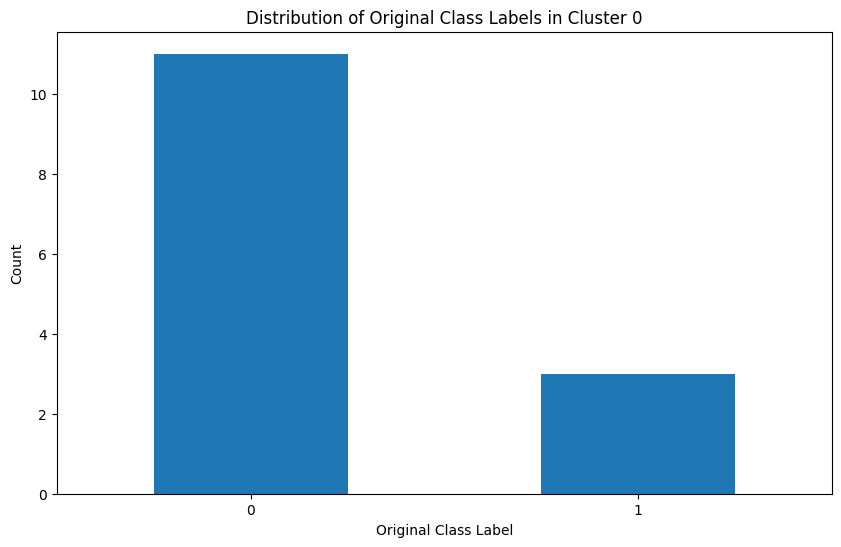

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `clusters` is the array of cluster labels from DBSCAN,
# and `y_train` contains the original class labels

# Step 1: Select a Cluster for Analysis
selected_cluster = 0  # Change this to the cluster you want to analyze

# Step 2: Filter Data Points in the Selected Cluster
# Note: Adjust this if you want to include/exclude noise points
indices_in_cluster = (clusters == selected_cluster)
original_labels_in_cluster = y_train[indices_in_cluster]

# Step 3: Count the Number of Data Points for Each Original Class
label_counts = pd.Series(original_labels_in_cluster).value_counts()

# Step 4: Plot the Bar Chart
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title(f'Distribution of Original Class Labels in Cluster {selected_cluster}')
plt.xlabel('Original Class Label')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the class labels upright for clarity
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming `clusters` is the array of cluster labels from DBSCAN,
# and `y_train` contains the original class labels

# Get unique clusters, including noise
unique_clusters = np.unique(clusters)

# Set up the plot
fig, axs = plt.subplots(len(unique_clusters), 1, figsize=(10, 6 * len(unique_clusters)))

if len(unique_clusters) == 1:  # If there's only one cluster, axs is not an array
    axs = [axs]

for idx, cluster in enumerate(unique_clusters):
    # Filter Data Points in the Current Cluster
    indices_in_cluster = (clusters == cluster)
    original_labels_in_cluster = y_train[indices_in_cluster]

    # Count the Number of Data Points for Each Original Class
    label_counts = pd.Series(original_labels_in_cluster).value_counts().sort_index()

    # Plot the Bar Chart for the Current Cluster
    axs[idx].bar(label_counts.index, label_counts.values)
    axs[idx].set_title(f'Cluster {cluster} Distribution')
    axs[idx].set_xlabel('Original Class Label')
    axs[idx].set_ylabel('Count')
    axs[idx].set_xticks(label_counts.index)  # Ensure all class labels are shown

plt.tight_layout()
plt.show()

# Calculate and print the proportion of normal vs abnormal data in each cluster
for cluster in unique_clusters:
    indices_in_cluster = clusters == cluster
    labels_in_cluster = y_train[indices_in_cluster]
    total_count = len(labels_in_cluster)
    normal_count = (labels_in_cluster == 0).sum()
    abnormal_count = total_count - normal_count
    print(f"Cluster {cluster}: Normal data proportion: {normal_count / total_count:.2f}, Abnormal data proportion: {abnormal_count / total_count:.2f}")


In [ ]:
X_train, y_train = concatenate_class_datasets(datasets, [1,2,3], type='train')

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

# Data Preparation (replace with your actual data loading)
# X, y = load_your_data()  # Load your dataset here

# Normalize your data
X_scaled_1 = scaler.fit_transform(datasets['x_train_class_1'])
X_scaled_test_1 = scaler.transform(datasets['x_test_class_1'])



def build_stacked_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    encoded = Dense(encoding_dim // 2, activation='relu')(encoded)
    decoded = Dense(encoding_dim // 2, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

# Model Training
input_dim = X_scaled_1.shape[1]
encoding_dim = 15

autoencoder_1 = build_stacked_autoencoder(input_dim, encoding_dim)
autoencoder_1.fit(X_scaled_1, X_scaled_1, epochs=50, batch_size=256, shuffle=True)


Epoch 1/50
31/31 [==============================] - 2s 3ms/step - loss: 0.6825
Epoch 2/50
31/31 [==============================] - 0s 3ms/step - loss: 0.6385
Epoch 3/50
31/31 [==============================] - 0s 3ms/step - loss: 0.5410
Epoch 4/50
31/31 [==============================] - 0s 3ms/step - loss: 0.3796
Epoch 5/50
31/31 [==============================] - 0s 3ms/step - loss: 0.2169
Epoch 6/50
31/31 [==============================] - 0s 4ms/step - loss: 0.1334
Epoch 7/50
31/31 [==============================] - 0s 3ms/step - loss: 0.1069
Epoch 8/50
31/31 [==============================] - 0s 3ms/step - loss: 0.0988
Epoch 9/50
31/31 [==============================] - 0s 3ms/step - loss: 0.0951
Epoch 10/50
31/31 [==============================] - 0s 3ms/step - loss: 0.0926
Epoch 11/50
31/31 [==============================] - 0s 3ms/step - loss: 0.0908
Epoch 12/50
31/31 [==============================] - 0s 3ms/step - loss: 0.0892
Epoch 13/50
31/31 [==============================

In [ ]:
# After training the autoencoder
reconstructed_train = autoencoder_1.predict(X_scaled_1)
train_mse = np.mean(np.power(X_scaled_1 - reconstructed_train, 2), axis=1)

# Setting the threshold as the average reconstruction error on the training data
threshold_1 = np.mean(train_mse)
print("Threshold:", threshold_1)

# Then use this threshold to detect anomalies in new data
test_mse = np.mean(np.power(X_scaled_test_1 - autoencoder_1.predict(X_scaled_test_1), 2), axis=1)
anomalies = test_mse > threshold_1
print("Anomaly Detected:", np.sum(anomalies))


245/245 [==============================] - 0s 1ms/step
Threshold: 0.0005696708742668283
4/4 [==============================] - 0s 3ms/step
Anomaly Detected: 11


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

# Data Preparation (replace with your actual data loading)
# X, y = load_your_data()  # Load your dataset here

# Normalize your data
X_scaled_2 = scaler.transform(datasets['x_train_class_2'])
X_scaled_test_2 = scaler.transform(datasets['x_test_class_2'])



def build_stacked_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    encoded = Dense(encoding_dim // 2, activation='relu')(encoded)
    decoded = Dense(encoding_dim // 2, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

# Model Training
input_dim = X_scaled_2.shape[1]
encoding_dim = 15

autoencoder_2 = build_stacked_autoencoder(input_dim, encoding_dim)
autoencoder_2.fit(X_scaled_2, X_scaled_2, epochs=50, batch_size=256, shuffle=True)


Epoch 1/50
54/54 [==============================] - 1s 2ms/step - loss: 0.6726
Epoch 2/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5486
Epoch 3/50
54/54 [==============================] - 0s 2ms/step - loss: 0.2711
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 0.1169
Epoch 5/50
54/54 [==============================] - 0s 2ms/step - loss: 0.0826
Epoch 6/50
54/54 [==============================] - 0s 2ms/step - loss: 0.0757
Epoch 7/50
54/54 [==============================] - 0s 2ms/step - loss: 0.0735
Epoch 8/50
54/54 [==============================] - 0s 2ms/step - loss: 0.0721
Epoch 9/50
54/54 [==============================] - 0s 2ms/step - loss: 0.0708
Epoch 10/50
54/54 [==============================] - 0s 2ms/step - loss: 0.0702
Epoch 11/50
54/54 [==============================] - 0s 2ms/step - loss: 0.0700
Epoch 12/50
54/54 [==============================] - 0s 2ms/step - loss: 0.0698
Epoch 13/50
54/54 [==============================

In [ ]:
reconstructed_train = autoencoder_2.predict(X_scaled_2)
train_mse = np.mean(np.power(X_scaled_2 - reconstructed_train, 2), axis=1)

# Setting the threshold as the average reconstruction error on the training data
threshold_2 = np.mean(train_mse)
print("Threshold:", threshold_2)

# Then use this threshold to detect anomalies in new data
test_mse = np.mean(np.power(X_scaled_test_2 - autoencoder_2.predict(X_scaled_test_2), 2), axis=1)
anomalies = test_mse > threshold_2
print("Anomaly Detected:", np.sum(anomalies))

430/430 [==============================] - 1s 1ms/step
Threshold: 2.7436168818761192e-05
4/4 [==============================] - 0s 3ms/step
Anomaly Detected: 10


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

# Data Preparation (replace with your actual data loading)
# X, y = load_your_data()  # Load your dataset here

# Normalize your data
X_scaled_3 = scaler.transform(datasets['x_train_class_3'])
X_scaled_test_3 = scaler.transform(datasets['x_test_class_3'])



def build_stacked_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    encoded = Dense(encoding_dim // 2, activation='relu')(encoded)
    decoded = Dense(encoding_dim // 2, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

# Model Training
input_dim = X_scaled_3.shape[1]
encoding_dim = 15

autoencoder_3 = build_stacked_autoencoder(input_dim, encoding_dim)
autoencoder_3.fit(X_scaled_3, X_scaled_3, epochs=50, batch_size=256, shuffle=True)


Epoch 1/50
44/44 [==============================] - 1s 2ms/step - loss: 0.6722
Epoch 2/50
44/44 [==============================] - 0s 2ms/step - loss: 0.5985
Epoch 3/50
44/44 [==============================] - 0s 2ms/step - loss: 0.4516
Epoch 4/50
44/44 [==============================] - 0s 2ms/step - loss: 0.2899
Epoch 5/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1924
Epoch 6/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1479
Epoch 7/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1283
Epoch 8/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1189
Epoch 9/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1136
Epoch 10/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1103
Epoch 11/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1080
Epoch 12/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1063
Epoch 13/50
44/44 [==============================

In [ ]:
reconstructed_train = autoencoder_3.predict(X_scaled_3)
train_mse = np.mean(np.power(X_scaled_3 - reconstructed_train, 2), axis=1)

# Setting the threshold as the average reconstruction error on the training data
threshold_3 = np.mean(train_mse)
print("Threshold:", threshold_3)

# Then use this threshold to detect anomalies in new data
test_mse = np.mean(np.power(X_scaled_test_3 - autoencoder_3.predict(X_scaled_test_3), 2), axis=1)
anomalies = test_mse > threshold_3
print("Anomaly Detected:", np.sum(anomalies))

351/351 [==============================] - 1s 1ms/step
Threshold: 0.00029952251026669975
4/4 [==============================] - 0s 3ms/step
Anomaly Detected: 19


In [13]:
X_test, y_test = concatenate_class_datasets(datasets, [1,2,3], type='test')

In [ ]:
X_scaled_test = scaler.transform(X_test)

In [ ]:
test_mse_1 = np.mean(np.power(X_scaled_test - autoencoder_1.predict(X_scaled_test), 2), axis=1)
# test_mse_1 -= threshold_1

10/10 [==============================] - 0s 3ms/step


In [ ]:
test_mse_1

array([1.67291583e-04, 1.90146906e-04, 7.09922533e-04, 1.55220929e-05,
       1.59231688e-05, 1.63343742e-05, 1.57085824e-05, 2.38743649e-05,
       3.34053999e-04, 1.61414770e-05, 1.51107667e-04, 1.62950862e-05,
       1.64934779e-04, 1.39653233e-05, 1.63387034e-05, 1.63393147e-05,
       2.13916569e-01, 1.32488187e-05, 1.63390297e-05, 1.69807316e-02,
       1.63390210e-05, 8.06240101e-05, 1.63452381e-05, 1.61404588e-05,
       1.63388857e-05, 1.50974866e-05, 3.43316280e-04, 1.63195254e-05,
       1.08034293e-03, 9.60961059e-06, 2.18835927e-05, 1.59480426e-05,
       5.13740847e-05, 1.66112122e-05, 1.20078984e-05, 1.10797181e-05,
       5.04407111e-06, 1.55337264e-05, 1.63393290e-05, 1.63386956e-05,
       1.50051860e-05, 1.32132466e-05, 1.48094898e-05, 2.32100117e-05,
       1.47201410e-05, 2.33892875e-04, 1.99485615e-04, 1.74448542e-03,
       1.20445495e-04, 2.18429788e-05, 1.63390959e-05, 1.13147272e-03,
       9.36901068e-05, 1.19244791e-05, 1.78892806e-02, 1.63394051e-05,
      

In [ ]:
test_mse_2 = np.mean(np.power(X_scaled_test - autoencoder_2.predict(X_scaled_test), 2), axis=1)
# test_mse_2 -= threshold_2

10/10 [==============================] - 0s 2ms/step


In [ ]:
test_mse_2

array([4.15331790e-04, 2.47835062e-05, 1.61528851e-04, 2.25207831e-06,
       2.25171012e-06, 8.49565427e-07, 3.06007929e-06, 1.67932469e-04,
       6.23042813e-05, 8.62434557e-07, 6.36606138e-04, 8.71217850e-07,
       7.69197407e-04, 3.10332316e-06, 8.50283430e-07, 8.50401370e-07,
       2.09703909e-01, 4.85025301e-06, 8.50328662e-07, 2.06167803e-02,
       8.50297502e-07, 4.69908292e-04, 8.49890486e-07, 2.24151050e-06,
       8.50271159e-07, 1.64027469e-06, 6.72713100e-04, 8.46146688e-07,
       1.48573293e-02, 1.39111694e-05, 2.14403082e-04, 2.99860192e-06,
       3.24257458e-04, 1.08852707e-04, 3.36734324e-05, 3.60434355e-05,
       2.03494514e-05, 2.03904568e-06, 8.50368250e-07, 8.50283348e-07,
       1.98219897e-06, 2.61800336e-05, 3.05709048e-06, 2.52365653e-04,
       2.58813538e-06, 7.45174527e-04, 1.28726274e-03, 2.01978368e-02,
       7.92050111e-04, 1.12092804e-04, 8.50353875e-07, 2.26580602e-02,
       6.18219799e-04, 7.19863302e-06, 2.17573098e-02, 8.50376937e-07,
      

In [ ]:
test_mse_3 = np.mean(np.power(X_scaled_test - autoencoder_3.predict(X_scaled_test), 2), axis=1)
# test_mse_3 -= threshold_3

10/10 [==============================] - 0s 3ms/step


In [ ]:
test_mse_3

array([2.25510300e-04, 2.05843374e-04, 7.77580082e-04, 4.95793692e-06,
       5.10643147e-06, 4.90291584e-06, 5.14633653e-06, 4.01791557e-05,
       3.66911737e-04, 4.92921887e-06, 2.56007948e-04, 4.89366105e-06,
       8.35988329e-05, 5.04950702e-06, 4.90340354e-06, 4.90347045e-06,
       2.87747317e-01, 4.84350737e-06, 4.90349455e-06, 3.01630975e-03,
       4.90343720e-06, 1.28820384e-04, 4.90595665e-06, 5.12962997e-06,
       4.90346169e-06, 4.67125108e-06, 4.22273608e-04, 4.90363630e-06,
       1.93227014e-03, 5.36174051e-06, 5.32809990e-05, 5.23378447e-06,
       6.12989193e-05, 2.61029584e-05, 1.49782518e-05, 1.79049424e-05,
       5.60457786e-06, 4.82595089e-06, 4.90344460e-06, 4.90339160e-06,
       4.69631873e-06, 9.50261353e-06, 4.79183876e-06, 5.81210198e-05,
       4.70456312e-06, 3.37132932e-04, 1.17845478e-04, 9.26960722e-04,
       1.90439553e-04, 3.12610091e-05, 4.90339820e-06, 1.09458144e-03,
       1.30377671e-04, 4.82418831e-06, 1.43231241e-03, 4.90351526e-06,
      

In [ ]:
error_matrix = np.vstack((test_mse_1, test_mse_2, test_mse_3))

# Get the index of the AE with the lowest error for each sample
predictions = np.argmin(error_matrix, axis=0) + 1  # Adding 1 to get 1-based indexing

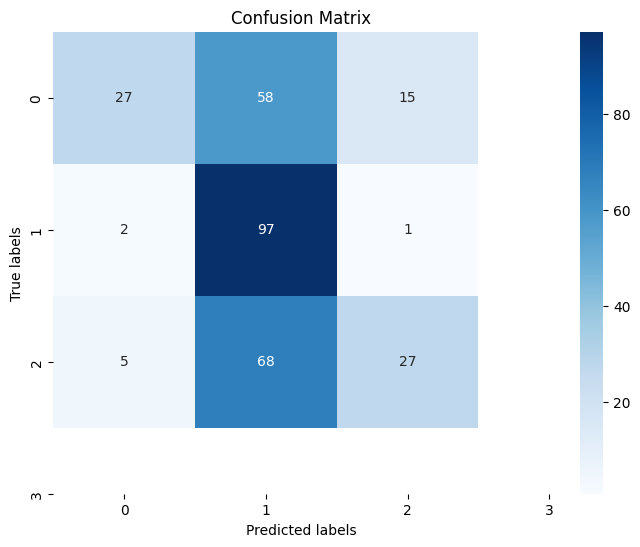

Accuracy: 0.5033
F1 Score (Weighted): 0.4604
F1 Score (Unweighted): 0.4604
F2 Score (Weighted): 0.4648
F2 Score (Unweighted): 0.4648


In [ ]:
showResult(y_test, predictions)

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np



# Training Isolation Forests for each anomaly type
iso_forest_type1 = IsolationForest(n_estimators=100, contamination='auto').fit(scaler.transform(datasets['x_train_class_1']))
iso_forest_type2 = IsolationForest(n_estimators=100, contamination='auto').fit(scaler.transform(datasets['x_train_class_2']))
iso_forest_type3 = IsolationForest(n_estimators=100, contamination='auto').fit(scaler.transform(datasets['x_train_class_3']))

In [ ]:
# Function to predict the anomaly type
def predict_anomaly_type(X_test):
    scores_type1 = iso_forest_type1.decision_function(X_test)
    scores_type2 = iso_forest_type2.decision_function(X_test)
    scores_type3 = iso_forest_type3.decision_function(X_test)

    print(scores_type1, scores_type2, scores_type3)

    scores = np.column_stack((scores_type1, scores_type2, scores_type3))
    predicted_type = np.argmax(scores, axis=1) + 1  # +1 to match the type numbering

    return predicted_type

In [ ]:
anomaly_class_predict = predict_anomaly_type(X_scaled_test)

[ 0.16839188  0.15998651  0.15691219  0.19851254  0.19805275  0.19909514
  0.19700375  0.14079347  0.10793349  0.08335287  0.13500313  0.1992121
  0.17438954  0.19873933  0.20012391  0.19956053 -0.11537594  0.19631486
  0.20012391 -0.09707318  0.20012391  0.17846919  0.19976821  0.19800938
  0.20012391  0.19946012  0.14803717  0.18448882  0.08613713  0.19780392
  0.19103303  0.19566788  0.186337    0.129656    0.19451944  0.17608896
  0.03498011  0.199704    0.19956053  0.20012391  0.19874727  0.19680821
  0.19869832  0.19056879  0.1925717   0.11665117  0.15595737  0.0355946
  0.1146908   0.18788196  0.19956053 -0.16361192  0.18495428  0.19302999
 -0.14105508  0.20012391  0.19956053  0.18372562  0.17853325  0.16063979
  0.19569332  0.20012391  0.1960086   0.19956053  0.19956053  0.199704
  0.19781624  0.19343755  0.19976821 -0.11263472  0.18559157  0.17354198
  0.19708329  0.170633    0.20012391  0.19694746  0.02226962  0.18232001
  0.19498882  0.19956053  0.19924263  0.14386933  0.200

In [ ]:
import numpy as np

# Assuming anomaly_class_predict is a numpy array
unique, counts = np.unique(anomaly_class_predict, return_counts=True)
value_counts = dict(zip(unique, counts))

print(value_counts)

{1: 281, 3: 19}


In [14]:
X_train_1, y_train_1 = concatenate_class_datasets(datasets, [0,1], type='train')
X_test_1, y_test_1 = concatenate_class_datasets(datasets, [0,1], type='test')
y_train_1 = y_train_1.apply(lambda x: 1 if x in [1, 2, 3] else 0)
y_test_1 = y_test_1.apply(lambda x: 1 if x in [1, 2, 3] else 0)

In [15]:
X_train_2, y_train_2 = concatenate_class_datasets(datasets, [0,2], type='train')
X_test_2, y_test_2 = concatenate_class_datasets(datasets, [0,2], type='test')
y_train_2 = y_train_2.apply(lambda x: 1 if x in [1, 2, 3] else 0)
y_test_2 = y_test_2.apply(lambda x: 1 if x in [1, 2, 3] else 0)

In [16]:
X_train_3, y_train_3 = concatenate_class_datasets(datasets, [0,3], type='train')
X_test_3, y_test_3 = concatenate_class_datasets(datasets, [0,3], type='test')
y_train_3 = y_train_3.apply(lambda x: 1 if x in [1, 2, 3] else 0)
y_test_3 = y_test_3.apply(lambda x: 1 if x in [1, 2, 3] else 0)

In [ ]:
y_train.value_counts()

2    13757
3    11228
1     7823
Name: label, dtype: int64

In [17]:
X_train, y_train = concatenate_class_datasets(datasets, [1,2,3], type='train')
X_test, y_test = concatenate_class_datasets(datasets, [1,2,3], type='test')

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

pipeline_rf_up = make_pipeline_imb(
    MinMaxScaler(),
    RandomForestClassifier(random_state=42)
)


# Define the parameter grid
param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 200, 300, 500],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'randomforestclassifier__max_depth': [10, 13, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__bootstrap': [True, False],
    'randomforestclassifier__criterion': ['gini', 'entropy']
}

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    pipeline_rf_up,
    param_distributions=param_grid_rf,
    n_iter=100,  # Number of parameter settings sampled. Increase or decrease based on computational resource.
    cv=5,
    scoring='average_precision',
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use parallel computation. Set to -1 to use all available cores.
)

# Fit RandomizedSearchCV to the training data
random_search_rf.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search_rf.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found:  {'randomforestclassifier__n_estimators': 500, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 13, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__bootstrap': True}


In [20]:
y_train_xgb = y_train.map({1: 0, 2: 1, 3: 2}).fillna(y_train)

In [21]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': np.arange(50, 400, 50),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': np.arange(3, 10),
    'min_child_weight': [1, 2, 5, 10],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 0.1, 0.5, 0.01]
}

# Initialize the XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train_xgb)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

# Predict using the best found parameters
best_estimator = random_search.best_estimator_
predictions = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("Accuracy on test set: ", accuracy)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 350, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9}
Best accuracy found:  0.7419840884604338
Accuracy on test set:  0.12


In [ ]:

rf_params = {'randomforestclassifier__n_estimators': 500, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 13, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__bootstrap': True}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.preprocessing import StandardScaler

pipeline_xgb_up = make_pipeline_imb(
    MinMaxScaler(),
    xgb.XGBClassifier(random_state=42)
)

# Define the parameter grid
param_grid_xgb = {
    'xgbclassifier__n_estimators': [100, 200, 300, 500],
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgbclassifier__max_depth': [3, 4, 5, 6, 7, 8],
    'xgbclassifier__min_child_weight': [1, 2, 5, 10],
    'xgbclassifier__gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'xgbclassifier__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgbclassifier__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgbclassifier__reg_alpha': [0, 0.1, 0.5, 1],
    'xgbclassifier__reg_lambda': [1, 0.1, 0.5, 0.01]
}



# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    pipeline_xgb_up,
    param_distributions=param_grid_xgb,
    n_iter=100,  # Number of parameter settings sampled. Increase or decrease based on computational resource.
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use parallel computation. Set to -1 to use all available cores.
)

# Fit RandomizedSearchCV to the training data
random_search_rf.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search_rf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


ValueError: 
All the 500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1471, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1 2 3]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.preprocessing import StandardScaler

pipeline_knn_up = make_pipeline_imb(
    MinMaxScaler(),
    RandomOverSampler(),
    KNeighborsClassifier()
)

# Define the parameter grid
param_grid_knn = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__leaf_size': [10, 30, 50, 70],
    'kneighborsclassifier__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}




# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    pipeline_knn_up,
    param_distributions=param_grid_knn,
    n_iter=100,  # Number of parameter settings sampled. Increase or decrease based on computational resource.
    cv=5,
    scoring='average_precision',
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use parallel computation. Set to -1 to use all available cores.
)

# Fit RandomizedSearchCV to the training data
random_search_rf.fit(X_train_1, y_train_1)

# Print the best parameters
print("Best parameters found: ", random_search_rf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__p': 1, 'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__leaf_size': 70, 'kneighborsclassifier__algorithm': 'brute'}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.preprocessing import StandardScaler

pipeline_knn_up = make_pipeline_imb(
    MinMaxScaler(),
    RandomOverSampler(),
    KNeighborsClassifier()
)

# Define the parameter grid
param_grid_knn = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__leaf_size': [10, 30, 50, 70],
    'kneighborsclassifier__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}




# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    pipeline_knn_up,
    param_distributions=param_grid_knn,
    n_iter=100,  # Number of parameter settings sampled. Increase or decrease based on computational resource.
    cv=5,
    scoring='average_precision',
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use parallel computation. Set to -1 to use all available cores.
)

# Fit RandomizedSearchCV to the training data
random_search_rf.fit(X_train_2, y_train_2)

# Print the best parameters
print("Best parameters found: ", random_search_rf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__p': 1, 'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__leaf_size': 10, 'kneighborsclassifier__algorithm': 'brute'}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.preprocessing import StandardScaler

pipeline_knn_up = make_pipeline_imb(
    MinMaxScaler(),
    RandomOverSampler(),
    KNeighborsClassifier()
)

# Define the parameter grid
param_grid_knn = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__leaf_size': [10, 30, 50, 70],
    'kneighborsclassifier__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}




# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    pipeline_knn_up,
    param_distributions=param_grid_knn,
    n_iter=100,  # Number of parameter settings sampled. Increase or decrease based on computational resource.
    cv=5,
    scoring='average_precision',
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use parallel computation. Set to -1 to use all available cores.
)

# Fit RandomizedSearchCV to the training data
random_search_rf.fit(X_train_3, y_train_3)

# Print the best parameters
print("Best parameters found: ", random_search_rf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__p': 1, 'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__leaf_size': 50, 'kneighborsclassifier__algorithm': 'brute'}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

pipeline_rf_up = make_pipeline_imb(
    MinMaxScaler(),
    RandomOverSampler(),
    RandomForestClassifier(random_state=42)
)


# Define the parameter grid
param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 200, 300, 500],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'randomforestclassifier__max_depth': [10, 13, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__bootstrap': [True, False],
    'randomforestclassifier__criterion': ['gini', 'entropy']
}

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    pipeline_rf_up,
    param_distributions=param_grid_rf,
    n_iter=100,  # Number of parameter settings sampled. Increase or decrease based on computational resource.
    cv=5,
    scoring='average_precision',
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use parallel computation. Set to -1 to use all available cores.
)

# Fit RandomizedSearchCV to the training data
random_search_rf.fit(X_train_1, y_train_1)

# Print the best parameters
print("Best parameters found: ", random_search_rf.best_params_)


NameError: name 'X_train_1' is not defined

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

pipeline_rf_up = make_pipeline_imb(
    MinMaxScaler(),
    RandomOverSampler(),
    RandomForestClassifier(random_state=42)
)


# Define the parameter grid
param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 200, 300, 500],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'randomforestclassifier__max_depth': [10, 13, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__bootstrap': [True, False],
    'randomforestclassifier__criterion': ['gini', 'entropy']
}

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    pipeline_rf_up,
    param_distributions=param_grid_rf,
    n_iter=100,  # Number of parameter settings sampled. Increase or decrease based on computational resource.
    cv=5,
    scoring='average_precision',
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use parallel computation. Set to -1 to use all available cores.
)

# Fit RandomizedSearchCV to the training data
random_search_rf.fit(X_train_2, y_train_2)

# Print the best parameters
print("Best parameters found: ", random_search_rf.best_params_)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

pipeline_rf_up = make_pipeline_imb(
    MinMaxScaler(),
    RandomOverSampler(),
    RandomForestClassifier(random_state=42)
)


# Define the parameter grid
param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 200, 300, 500],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'randomforestclassifier__max_depth': [10, 13, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__bootstrap': [True, False],
    'randomforestclassifier__criterion': ['gini', 'entropy']
}

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    pipeline_rf_up,
    param_distributions=param_grid_rf,
    n_iter=100,  # Number of parameter settings sampled. Increase or decrease based on computational resource.
    cv=5,
    scoring='average_precision',
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use parallel computation. Set to -1 to use all available cores.
)

# Fit RandomizedSearchCV to the training data
random_search_rf.fit(X_train_3, y_train_3)

# Print the best parameters
print("Best parameters found: ", random_search_rf.best_params_)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.preprocessing import MinMaxScaler

# Define the random forest classifier with the specified parameters
rf_params = {
    'n_estimators': 500,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'max_depth': 13,
    'criterion': 'entropy',
    'bootstrap': True
}

rf_model_anomaly = RandomForestClassifier(**rf_params)

pipeline_rf_up = make_pipeline_imb(
    MinMaxScaler(),
    rf_model_anomaly
)

In [30]:
X_train, y_train = concatenate_class_datasets(datasets, [1,2,3], type='train')
X_test, y_test = concatenate_class_datasets(datasets, [1,2,3], type='test')
# y_train = y_train.map({1: 0, 2: 1, 3: 2}).fillna(y_train)
# y_test = y_test.map({1: 0, 2: 1, 3: 2}).fillna(y_test)


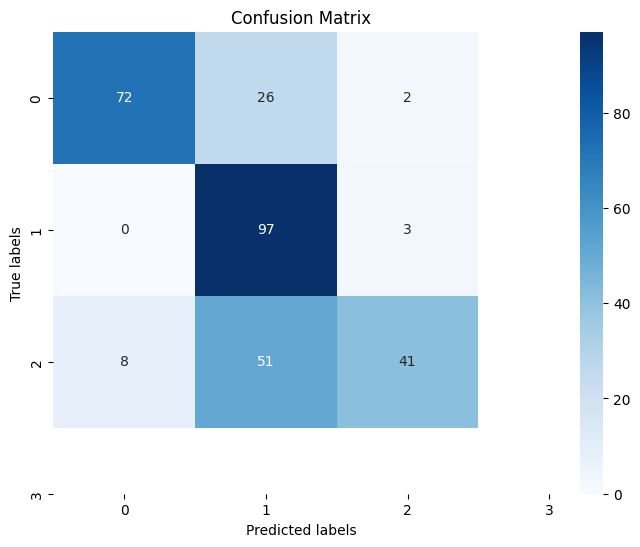

Accuracy: 0.7000
F1 Score (Weighted): 0.6899
F1 Score (Unweighted): 0.6899
F2 Score (Weighted): 0.6849
F2 Score (Unweighted): 0.6849


In [31]:
pipeline_rf_up.fit(X_train, y_train)

# Make predictions
rf_predictions = pipeline_rf_up.predict(X_test)

# Show results
showResult(y_test, rf_predictions)

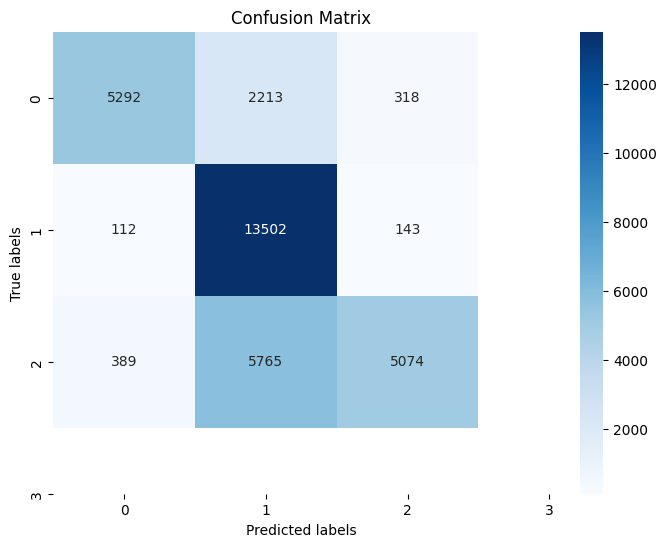

Accuracy: 0.7275
F1 Score (Weighted): 0.7139
F1 Score (Unweighted): 0.7164
F2 Score (Weighted): 0.7122
F2 Score (Unweighted): 0.6996


In [32]:

# Make predictions
rf_predictions = pipeline_rf_up.predict(X_train)

# Show results
showResult(y_train, rf_predictions)

In [27]:
X_train, y_train = concatenate_class_datasets(datasets, [1,2,3], type='train')
X_test, y_test = concatenate_class_datasets(datasets, [1,2,3], type='test')
y_train = y_train.map({1: 0, 2: 1, 3: 2}).fillna(y_train)
y_test = y_test.map({1: 0, 2: 1, 3: 2}).fillna(y_test)

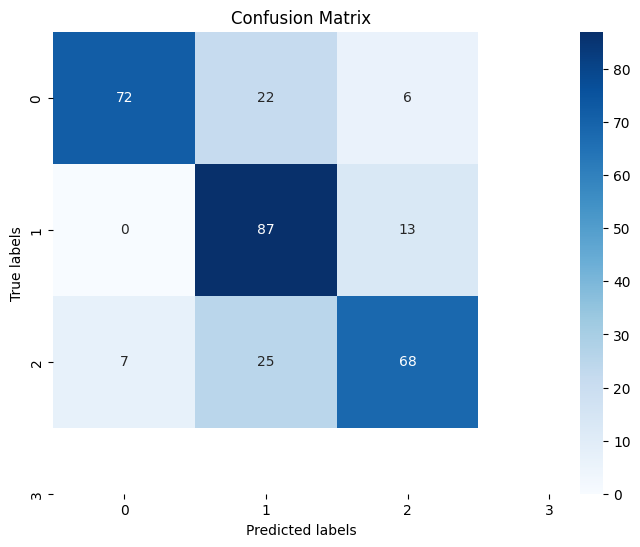

Accuracy: 0.7567
F1 Score (Weighted): 0.7584
F1 Score (Unweighted): 0.7584
F2 Score (Weighted): 0.7548
F2 Score (Unweighted): 0.7548


In [28]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.preprocessing import MinMaxScaler

# Define the random forest classifier with the specified parameters
xgb_params = {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 350, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9, 'use_label_encoder':False}

xgb_clf_anomaly = XGBClassifier(**xgb_params)

pipeline_xgb_up = make_pipeline_imb(
    MinMaxScaler(),
    xgb_clf_anomaly
)

pipeline_xgb_up.fit(X_train, y_train)

# Make predictions
xgb_predictions = pipeline_xgb_up.predict(X_test)

# Show results
showResult(y_test, xgb_predictions)

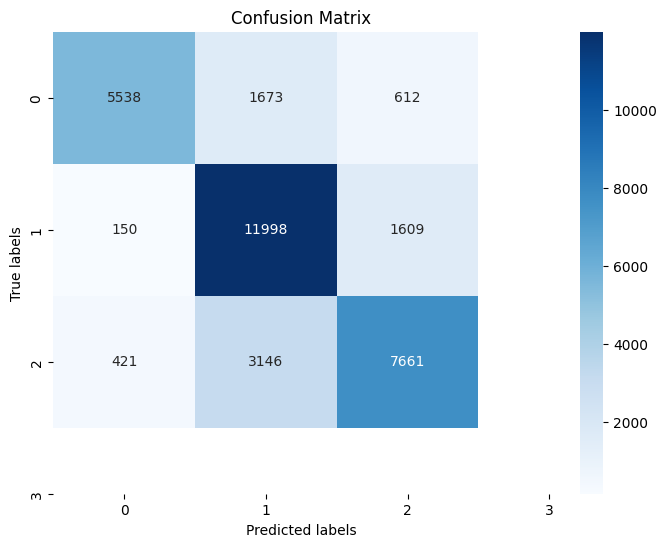

Accuracy: 0.7680
F1 Score (Weighted): 0.7671
F1 Score (Unweighted): 0.7686
F2 Score (Weighted): 0.7659
F2 Score (Unweighted): 0.7581


In [29]:
xgb_predictions = pipeline_xgb_up.predict(X_train)

# Show results
showResult(y_train, xgb_predictions)

In [37]:
X_train, y_train = concatenate_class_datasets(datasets, [1,2,3], type='train')
X_test, y_test = concatenate_class_datasets(datasets, [1,2,3], type='test')
y_train = y_train.map({1: 0, 2: 1, 3: 2}).fillna(y_train)
y_test = y_test.map({1: 0, 2: 1, 3: 2}).fillna(y_test)

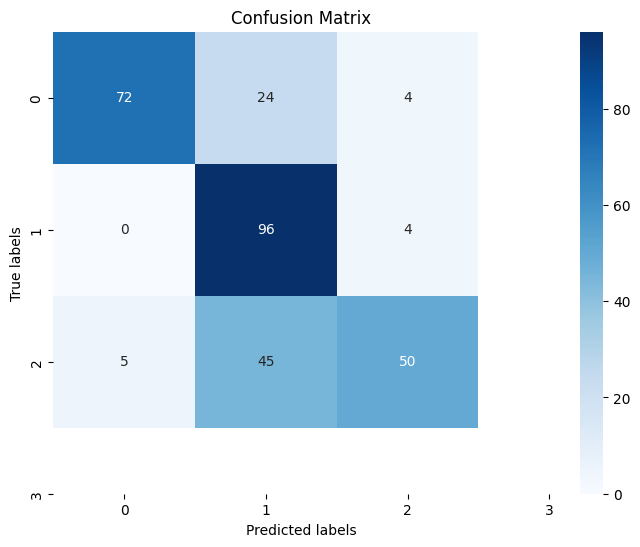

Accuracy: 0.7267
F1 Score (Weighted): 0.7237
F1 Score (Unweighted): 0.7237
F2 Score (Weighted): 0.7167
F2 Score (Unweighted): 0.7167


In [39]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

xgb_params = {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 350, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9, 'use_label_encoder':False}

xgb_clf_anomaly = XGBClassifier(**xgb_params)

pipeline_xgb_up = make_pipeline_imb(
    MinMaxScaler(),
    xgb_clf_anomaly
)

rf_params = {
    'n_estimators': 500,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'max_depth': 13,
    'criterion': 'entropy',
    'bootstrap': True
}

rf_model_anomaly = RandomForestClassifier(**rf_params)

pipeline_rf_up = make_pipeline_imb(
    MinMaxScaler(),
    rf_model_anomaly
)



ensemble_model = VotingClassifier(
    estimators=[
        ('rf_up', pipeline_rf_up),
        ('xgb_up', pipeline_xgb_up),
    ],
    voting='soft'
)

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
ensemble_predictions = ensemble_model.predict(X_test)

# Show results
showResult(y_test, ensemble_predictions)

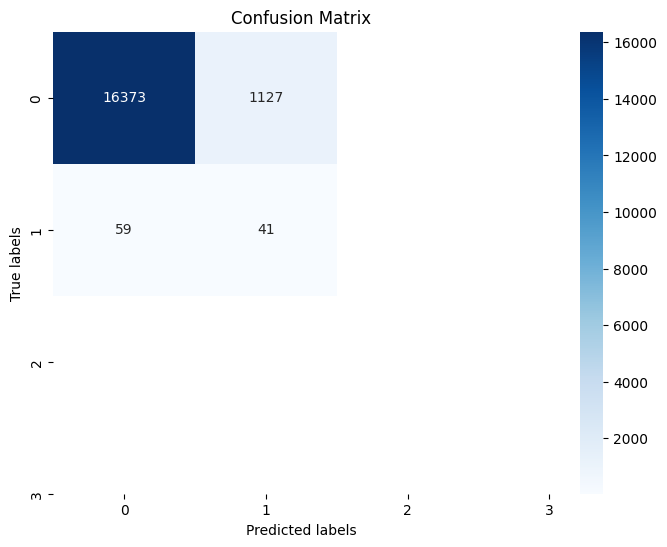

Accuracy: 0.9326
F1 Score (Weighted): 0.9599
F1 Score (Unweighted): 0.5149
F2 Score (Weighted): 0.9425
F2 Score (Unweighted): 0.5390


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Set the parameters
k_neighbors = 7
weights = 'distance'
p = 1
leaf_size = 70
algorithm = 'brute'

# Create the KNN model with the specified parameters
knn_model_1 = KNeighborsClassifier(
    n_neighbors=k_neighbors,
    weights=weights,
    p=p,
    leaf_size=leaf_size,
    algorithm=algorithm
)

# Now, you can fit this model to your training data and use it for predictions.
# Example:
knn_model_1.fit(X_train_1, y_train_1)
y_pred = knn_model_1.predict(X_test_1)
showResult(y_test_1, y_pred)


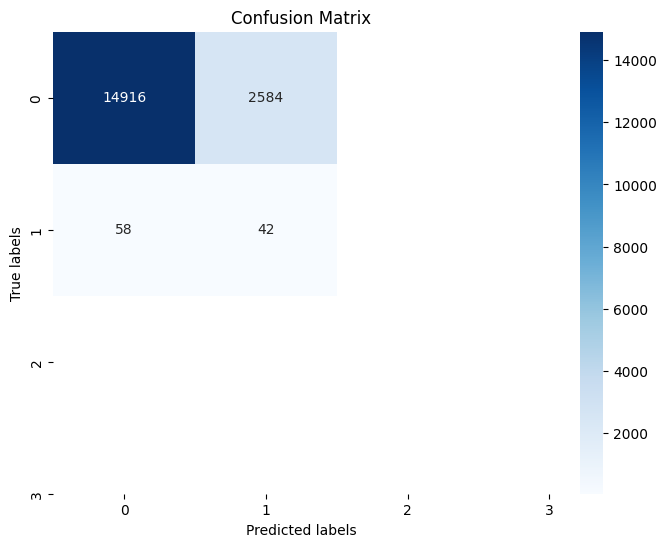

Accuracy: 0.8499
F1 Score (Weighted): 0.9136
F1 Score (Unweighted): 0.4747
F2 Score (Weighted): 0.8731
F2 Score (Unweighted): 0.4735


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Set the parameters
k_neighbors = 7
weights = 'distance'
p = 1
leaf_size = 10
algorithm = 'brute'

# Create the KNN model with the specified parameters
knn_model_2 = KNeighborsClassifier(
    n_neighbors=k_neighbors,
    weights=weights,
    p=p,
    leaf_size=leaf_size,
    algorithm=algorithm
)

# Now, you can fit this model to your training data and use it for predictions.
# Example:
knn_model_2.fit(X_train_2, y_train_2)
y_pred = knn_model_2.predict(X_test_2)
showResult(y_test_2, y_pred)


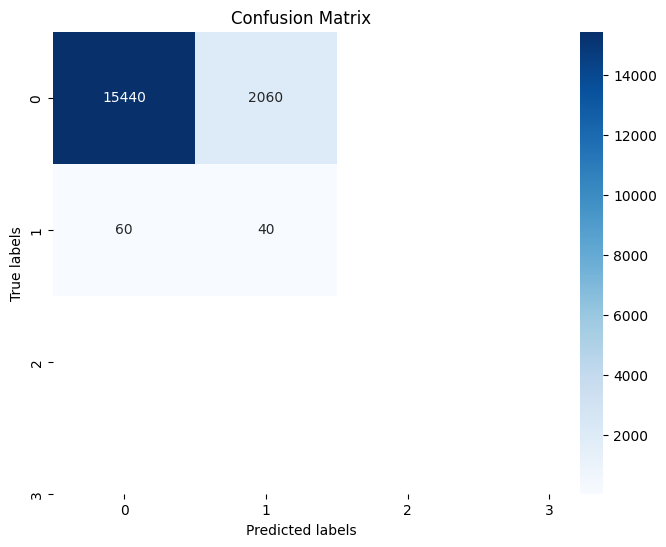

Accuracy: 0.8795
F1 Score (Weighted): 0.9306
F1 Score (Unweighted): 0.4861
F2 Score (Weighted): 0.8982
F2 Score (Unweighted): 0.4915


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Set the parameters
k_neighbors = 7
weights = 'distance'
p = 1
leaf_size = 50
algorithm = 'brute'

# Create the KNN model with the specified parameters
knn_model_3 = KNeighborsClassifier(
    n_neighbors=k_neighbors,
    weights=weights,
    p=p,
    leaf_size=leaf_size,
    algorithm=algorithm
)

# Now, you can fit this model to your training data and use it for predictions.
# Example:
knn_model_3.fit(X_train_3, y_train_3)
y_pred = knn_model_3.predict(X_test_3)
showResult(y_test_3, y_pred)


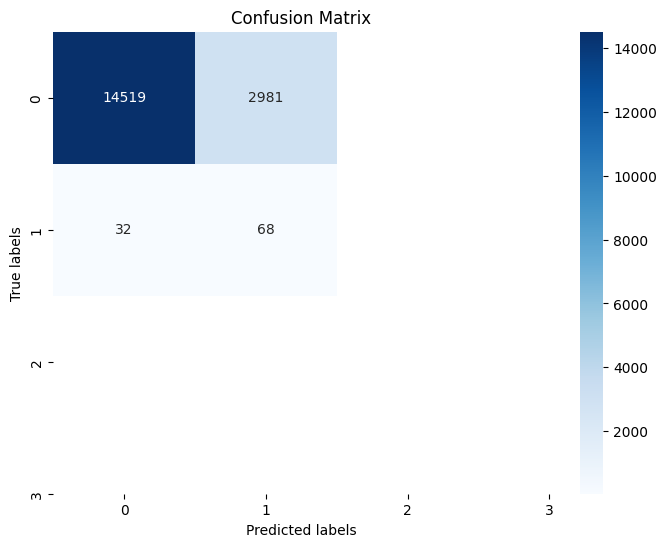

Accuracy: 0.8288
F1 Score (Weighted): 0.9011
F1 Score (Unweighted): 0.4746
F2 Score (Weighted): 0.8543
F2 Score (Unweighted): 0.4786


In [33]:
from sklearn.ensemble import RandomForestClassifier

# Define the random forest classifier with the specified parameters
rf_params = {
    'n_estimators': 300,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'max_depth': 13,
    'criterion': 'entropy',
    'bootstrap': True
}

rf_model = RandomForestClassifier(**rf_params)

rf_model = RandomForestClassifier(**rf_params)

pipeline_rf_up_1 = make_pipeline_imb(
    RandomOverSampler(random_state=42),
    rf_model
)

pipeline_rf_up_1.fit(X_train_1, y_train_1)

# Make predictions
rf_predictions = pipeline_rf_up_1.predict(X_test_1)

# Show results
showResult(y_test_1, rf_predictions)


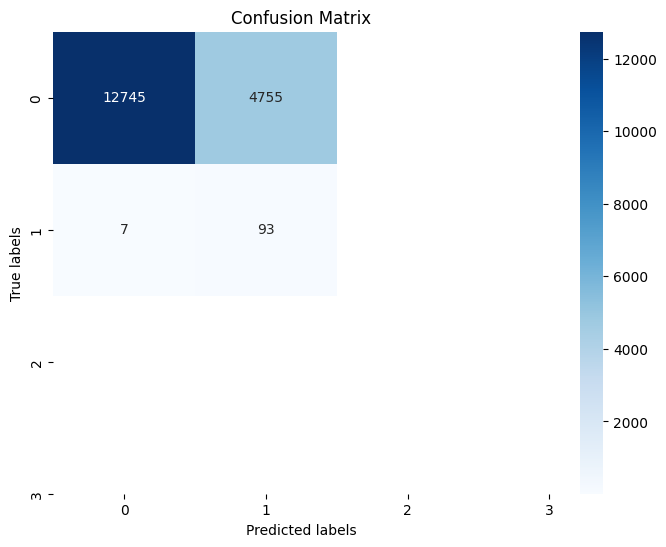

Accuracy: 0.7294
F1 Score (Weighted): 0.8380
F1 Score (Unweighted): 0.4401
F2 Score (Weighted): 0.7662
F2 Score (Unweighted): 0.4293


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Define the random forest classifier with the specified parameters
rf_params = {
    'n_estimators': 300,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'max_depth': 13,
    'criterion': 'entropy',
    'bootstrap': True
}

rf_model = RandomForestClassifier(**rf_params)

rf_model = RandomForestClassifier(**rf_params)

pipeline_rf_up_2 = make_pipeline_imb(
    RandomOverSampler(random_state=42),
    rf_model
)

pipeline_rf_up_2.fit(X_train_2, y_train_2)

# Make predictions
rf_predictions = pipeline_rf_up_2.predict(X_test_2)

# Show results
showResult(y_test_2, rf_predictions)


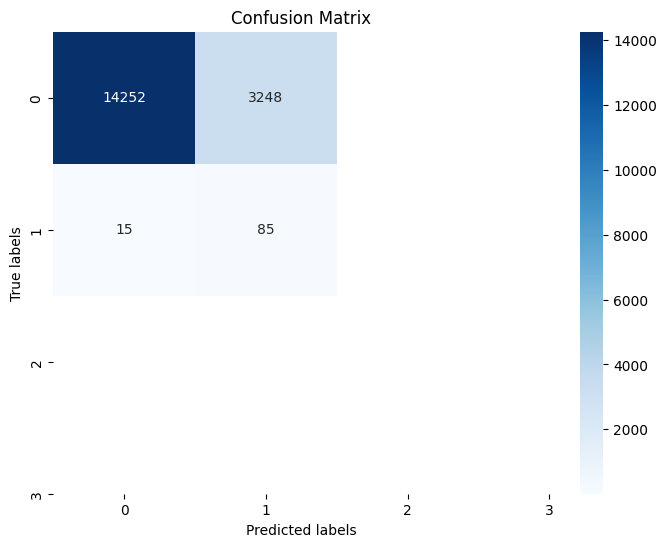

Accuracy: 0.8146
F1 Score (Weighted): 0.8925
F1 Score (Unweighted): 0.4734
F2 Score (Weighted): 0.8415
F2 Score (Unweighted): 0.4797


In [35]:
from sklearn.ensemble import RandomForestClassifier

# Define the random forest classifier with the specified parameters
rf_params = {
    'n_estimators': 300,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'max_depth': 13,
    'criterion': 'entropy',
    'bootstrap': True
}

rf_model = RandomForestClassifier(**rf_params)

rf_model = RandomForestClassifier(**rf_params)

pipeline_rf_up_3 = make_pipeline_imb(
    RandomOverSampler(random_state=42),
    rf_model
)

pipeline_rf_up_3.fit(X_train_3, y_train_3)

# Make predictions
rf_predictions = pipeline_rf_up_3.predict(X_test_3)

# Show results
showResult(y_test_3, rf_predictions)


In [ ]:
X_test, y_test = concatenate_class_datasets(datasets, [1], type='test')

In [ ]:
final_predictions = []

# Iterate through each test sample
for index, row in X_test.iterrows():
    class_predictions = []

    # Make predictions for each model
    pred1 = pipeline_rf_up_1.predict(row.values.reshape(1, -1))[0]
    pred2 = pipeline_rf_up_2.predict(row.values.reshape(1, -1))[0]
    pred3 = pipeline_rf_up_3.predict(row.values.reshape(1, -1))[0]

    # Convert model 2's prediction from 1 to 2
    if pred2 == 1:
        pred2 = 2

    # Convert model 3's prediction from 1 to 3
    if pred3 == 1:
        pred3 = 3

    # Store predictions from all models
    class_predictions.extend([pred1, pred2, pred3])

    # Count how many models predict class 0
    count_class_0 = class_predictions.count(0)

    # If at least two models predict class 0, set final prediction to 0
    if count_class_0 >= 2:
        final_prediction = 0
    else:
        # If not, choose the class with the highest probability
        model_probabilities = [
            pipeline_rf_up_1.predict_proba(row.values.reshape(1, -1)),
            pipeline_rf_up_2.predict_proba(row.values.reshape(1, -1)),
            pipeline_rf_up_3.predict_proba(row.values.reshape(1, -1))
        ]

        print(model_probabilities)
        final_prediction = np.argmax([prob[0][1] for prob in model_probabilities]) + 1

    final_predictions.append(final_prediction)

    break

print("Final Predictions:", final_predictions)


Final Predictions: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Final Evaluation

In [66]:
X_train, y_train = concatenate_class_datasets(datasets, [0,1,2,3], type='train')
X_test, y_test = concatenate_class_datasets(datasets, [0,1,2,3], type='test')
y_train = y_train.apply(lambda x: 1 if x in [1, 2, 3] else 0)
y_test = y_test.apply(lambda x: 1 if x in [1, 2, 3] else 0)

In [71]:
params_rf = {
    'n_estimators': 200,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_features': 'log2',
    'max_depth': 20,
    'criterion': 'entropy',
    'bootstrap': False
}

# Create the model
rf_model_binary = RandomForestClassifier(**params_rf)

pipeline_rf_binary = make_pipeline_imb(
    # MinMaxScaler(),
    rf_model_binary
)

pipeline_rf_binary.fit(X_train, y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        max_depth=20, max_features='log2',
                                        min_samples_leaf=2,
                                        n_estimators=200))])

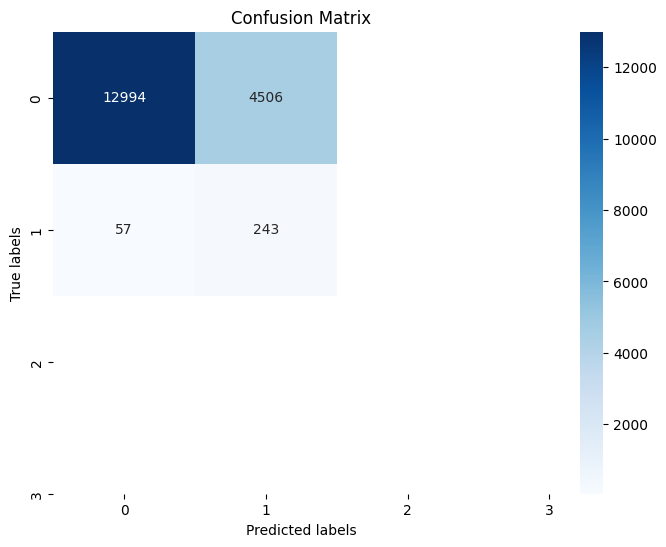

Accuracy: 0.7437
F1 Score (Weighted): 0.8379
F1 Score (Unweighted): 0.4734
F2 Score (Weighted): 0.7725
F2 Score (Unweighted): 0.4933


In [72]:
rf_predictions = pipeline_rf_binary.predict(X_test)
showResult(y_test, rf_predictions)

Anomaly Model

In [42]:
X_train_anomaly, y_train_anomaly = concatenate_class_datasets(datasets, [1,2,3], type='train')
# X_test, y_test = concatenate_class_datasets(datasets, [1,2,3], type='test')
y_train_anomaly = y_train_anomaly.map({1: 0, 2: 1, 3: 2}).fillna(y_train_anomaly)
# y_test = y_test.map({1: 0, 2: 1, 3: 2}).fillna(y_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.preprocessing import MinMaxScaler

# Define the random forest classifier with the specified parameters
xgb_params = {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 350, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9, 'use_label_encoder':False}

xgb_clf_anomaly = XGBClassifier(**xgb_params)

pipeline_xgb_anomaly = make_pipeline_imb(
    MinMaxScaler(),
    xgb_clf_anomaly
)

pipeline_xgb_anomaly.fit(X_train_anomaly, y_train_anomaly)


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.9, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=350,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', ...))])

Normal vs Class 1

In [44]:
X_train_1, y_train_1 = concatenate_class_datasets(datasets, [0,1], type='train')
# X_test_1, y_test_1 = concatenate_class_datasets(datasets, [0,1], type='test')
y_train_1 = y_train_1.apply(lambda x: 1 if x in [1, 2, 3] else 0)
# y_test_1 = y_test_1.apply(lambda x: 1 if x in [1, 2, 3] else 0)

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Define the random forest classifier with the specified parameters
rf_params = {
    'n_estimators': 300,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'max_depth': 13,
    'criterion': 'entropy',
    'bootstrap': True
}

rf_model = RandomForestClassifier(**rf_params)

pipeline_rf_1 = make_pipeline_imb(
    RandomOverSampler(random_state=42),
    rf_model
)

pipeline_rf_1.fit(X_train_1, y_train_1)

# # Make predictions
# rf_predictions = pipeline_rf_up_1.predict(X_test_1)

# # Show results
# showResult(y_test_1, rf_predictions)


Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=13,
                                        min_samples_leaf=4,
                                        n_estimators=300))])

Normal vs Class 2

In [46]:
X_train_2, y_train_2 = concatenate_class_datasets(datasets, [0,2], type='train')
# X_test_2, y_test_2 = concatenate_class_datasets(datasets, [0,2], type='test')
y_train_2 = y_train_2.apply(lambda x: 1 if x in [1, 2, 3] else 0)
# y_test_2 = y_test_2.apply(lambda x: 1 if x in [1, 2, 3] else 0)

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Define the random forest classifier with the specified parameters
rf_params = {
    'n_estimators': 300,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'max_depth': 13,
    'criterion': 'entropy',
    'bootstrap': True
}

rf_model = RandomForestClassifier(**rf_params)

pipeline_rf_2 = make_pipeline_imb(
    RandomOverSampler(random_state=42),
    rf_model
)

pipeline_rf_2.fit(X_train_2, y_train_2)

# # Make predictions
# rf_predictions = pipeline_rf_up_2.predict(X_test_2)

# # Show results
# showResult(y_test_2, rf_predictions)


Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=13,
                                        min_samples_leaf=4,
                                        n_estimators=300))])

Normal vs Class 3

In [48]:
X_train_3, y_train_3 = concatenate_class_datasets(datasets, [0,3], type='train')
# X_test_3, y_test_3 = concatenate_class_datasets(datasets, [0,3], type='test')
y_train_3 = y_train_3.apply(lambda x: 1 if x in [1, 2, 3] else 0)
# y_test_3 = y_test_3.apply(lambda x: 1 if x in [1, 2, 3] else 0)

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Define the random forest classifier with the specified parameters
rf_params = {
    'n_estimators': 300,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'max_depth': 13,
    'criterion': 'entropy',
    'bootstrap': True
}

rf_model = RandomForestClassifier(**rf_params)

pipeline_rf_3 = make_pipeline_imb(
    RandomOverSampler(random_state=42),
    rf_model
)

pipeline_rf_3.fit(X_train_3, y_train_3)

# # Make predictions
# rf_predictions = pipeline_rf_up_3.predict(X_test_3)

# # Show results
# showResult(y_test_3, rf_predictions)


Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=13,
                                        min_samples_leaf=4,
                                        n_estimators=300))])

Test

In [73]:
X_test, y_test = concatenate_class_datasets(datasets, [0,1,2,3], type='test')

In [64]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from joblib import load

# Assuming you have loaded your test dataset as X_test
# X_test = ...

# Load your trained models
# binary_classifier = load('binary_classifier.joblib')
# abnormal_class_type_classifier = load('abnormal_class_type_classifier.joblib')
# normal_vs_abnormal_type1_classifier = load('normal_vs_abnormal_type1_classifier.joblib')
# normal_vs_abnormal_type2_classifier = load('normal_vs_abnormal_type2_classifier.joblib')
# normal_vs_abnormal_type3_classifier = load('normal_vs_abnormal_type3_classifier.joblib')

binary_classifier = pipeline_rf_binary
abnormal_class_type_classifier = pipeline_xgb_anomaly
normal_vs_abnormal_type1_classifier = pipeline_rf_1
normal_vs_abnormal_type2_classifier = pipeline_rf_2
normal_vs_abnormal_type3_classifier = pipeline_rf_3

# Step 1: Binary Classification
binary_predictions = binary_classifier.predict(X_test)

# Identify indices for further analysis
indices_for_further_analysis = np.where(binary_predictions == 1)[0]

# Step 2: Abnormal Class Type Classification
abnormal_class_predictions = np.empty_like(binary_predictions)
# Only predict for those identified as abnormal in step 1
abnormal_class_predictions[indices_for_further_analysis] = abnormal_class_type_classifier.predict(X_test.iloc[indices_for_further_analysis])

# Step 3: Refinement with Specific Binary Classifiers
# Create a final predictions array
final_predictions = binary_predictions.copy()

# For each abnormal class, check with the specific binary classifier and adjust final predictions
# for idx in indices_for_further_analysis:
#     # Correctly select a single row as a DataFrame slice for prediction
#     sample = X_test.iloc[[idx]]

#     # Predict and compare the result correctly
#     if abnormal_class_predictions[idx] == 0:
#         prediction = normal_vs_abnormal_type1_classifier.predict(sample)
#         # Ensure comparison is made against the first element of the prediction array
#         final_predictions[idx] = 1 if prediction[0] == 1 else 0
#     elif abnormal_class_predictions[idx] == 1:
#         prediction = normal_vs_abnormal_type2_classifier.predict(sample)
#         final_predictions[idx] = 2 if prediction[0] == 1 else 0
#     elif abnormal_class_predictions[idx] == 2:
#         prediction = normal_vs_abnormal_type3_classifier.predict(sample)
#         final_predictions[idx] = 3 if prediction[0] == 1 else 0

# for idx in indices_for_further_analysis:
#     # Correctly select a single row as a DataFrame slice for prediction
#     sample = X_test.iloc[[idx]]

#     # Predict and compare the result correctly
#     if abnormal_class_predictions[idx] == 0:
#         # prediction = normal_vs_abnormal_type1_classifier.predict(sample)
#         # Ensure comparison is made against the first element of the prediction array
#         final_predictions[idx] = 1
#     elif abnormal_class_predictions[idx] == 1:
#         final_predictions[idx] = 2
#     elif abnormal_class_predictions[idx] == 2:
#         final_predictions[idx] = 3

# Threshold for considering a prediction confident
confidence_threshold = 0.5  # Adjust this threshold based on your specific needs

for idx in indices_for_further_analysis:
    sample = X_test.iloc[[idx]]

    # Get prediction probabilities for the sample
    if abnormal_class_predictions[idx] == 0:
        probabilities = normal_vs_abnormal_type1_classifier.predict_proba(sample)
        # Check if the probability of being abnormal (class 1) meets the confidence threshold
        final_predictions[idx] = 1 if probabilities[0][1] >= confidence_threshold else 0
    elif abnormal_class_predictions[idx] == 1:
        probabilities = normal_vs_abnormal_type2_classifier.predict_proba(sample)
        final_predictions[idx] = 2 if probabilities[0][1] >= confidence_threshold else 0
    elif abnormal_class_predictions[idx] == 2:
        probabilities = normal_vs_abnormal_type3_classifier.predict_proba(sample)
        final_predictions[idx] = 3 if probabilities[0][1] >= confidence_threshold else 0


# final_predictions now holds the final classification for each instance in the test set


In [58]:
final_predictions

array([0, 0, 0, ..., 3, 2, 2])

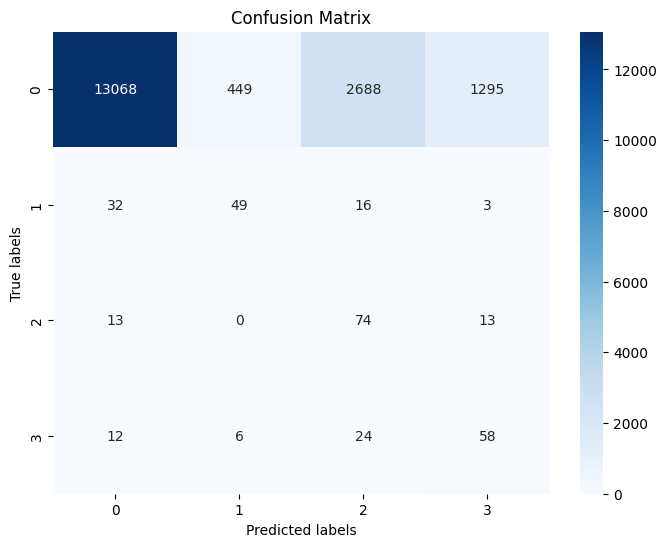

Accuracy: 0.7443
F1 Score (Weighted): 0.8407
F1 Score (Unweighted): 0.2864
F2 Score (Weighted): 0.7759
F2 Score (Unweighted): 0.3341


In [65]:
showResult(y_test, final_predictions)

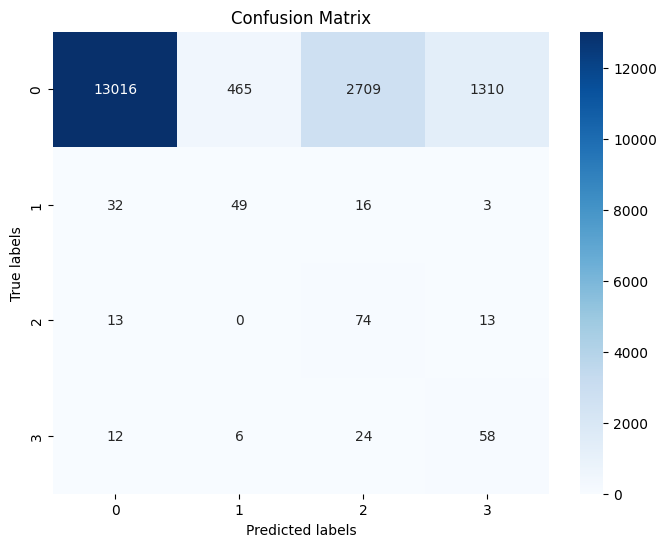

Accuracy: 0.7414
F1 Score (Weighted): 0.8387
F1 Score (Unweighted): 0.2846
F2 Score (Weighted): 0.7733
F2 Score (Unweighted): 0.3318


In [63]:
showResult(y_test, final_predictions)

In [74]:
import numpy as np

# Assuming X_test is your test dataset
# Initialize an array to hold the final predictions
final_predictions = np.zeros(X_test.shape[0])
# Initialize a matrix to hold the probabilities of being abnormal for each type
probabilities_matrix = np.zeros((X_test.shape[0], 3))

# Predict with each specific classifier and store probabilities
probabilities_matrix[:, 0] = normal_vs_abnormal_type1_classifier.predict_proba(X_test)[:, 1]  # Probabilities for Type 1
probabilities_matrix[:, 1] = normal_vs_abnormal_type2_classifier.predict_proba(X_test)[:, 1]  # Probabilities for Type 2
probabilities_matrix[:, 2] = normal_vs_abnormal_type3_classifier.predict_proba(X_test)[:, 1]  # Probabilities for Type 3

# Determine the final predictions based on the strategy described
for idx in range(X_test.shape[0]):
    # Check if all classifiers predict normal with high confidence
    if np.all(probabilities_matrix[idx, :] < 0.5):  # Using 0.5 as the threshold for deciding normal vs abnormal
        final_predictions[idx] = 0  # All classifiers agree on normal
    else:
        # Pick the abnormal class with the highest confidence
        final_predictions[idx] = np.argmax(probabilities_matrix[idx, :]) + 1  # +1 to adjust for the class label (1, 2, 3 for abnormal types)

# final_predictions now holds the final classification for each instance in the test set


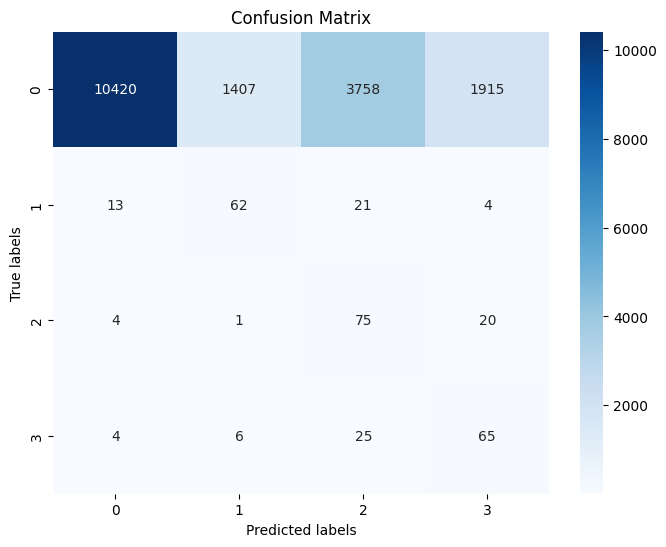

Accuracy: 0.5967
F1 Score (Weighted): 0.7343
F1 Score (Unweighted): 0.2310
F2 Score (Weighted): 0.6389
F2 Score (Unweighted): 0.2589


In [75]:
showResult(y_test, final_predictions)

In [76]:
import numpy as np

# Assuming X_test is your test dataset
# Initialize an array to hold the final predictions
final_predictions = np.zeros(X_test.shape[0])
# Initialize two matrices to hold the probabilities and binary predictions
probabilities_matrix = np.zeros((X_test.shape[0], 3))
binary_predictions_matrix = np.zeros((X_test.shape[0], 3))

# Predict with each specific classifier, store probabilities for being abnormal, and binary predictions
probabilities_matrix[:, 0] = normal_vs_abnormal_type1_classifier.predict_proba(X_test)[:, 1]  # Probabilities for Type 1
binary_predictions_matrix[:, 0] = normal_vs_abnormal_type1_classifier.predict(X_test)  # Predictions for Type 1

probabilities_matrix[:, 1] = normal_vs_abnormal_type2_classifier.predict_proba(X_test)[:, 1]  # Probabilities for Type 2
binary_predictions_matrix[:, 1] = normal_vs_abnormal_type2_classifier.predict(X_test)  # Predictions for Type 2

probabilities_matrix[:, 2] = normal_vs_abnormal_type3_classifier.predict_proba(X_test)[:, 1]  # Probabilities for Type 3
binary_predictions_matrix[:, 2] = normal_vs_abnormal_type3_classifier.predict(X_test)  # Predictions for Type 3

# Determine the final predictions based on the updated strategy
for idx in range(X_test.shape[0]):
    # Count how many models predict as normal
    normal_predictions_count = np.sum(binary_predictions_matrix[idx, :] == 0)

    # If two or more classifiers predict the sample as normal, classify it as normal
    if normal_predictions_count >= 2:
        final_predictions[idx] = 0  # Classify as normal
    else:
        # If not, find the index of the abnormal class with the highest confidence
        # Ignoring normal predictions by setting their probabilities to -1
        abnormal_probabilities = np.where(binary_predictions_matrix[idx, :] == 0, -1, probabilities_matrix[idx, :])
        final_predictions[idx] = np.argmax(abnormal_probabilities) + 1  # +1 to adjust for the class label (1, 2, 3 for abnormal types)

# final_predictions now holds the final classification for each instance in the test set


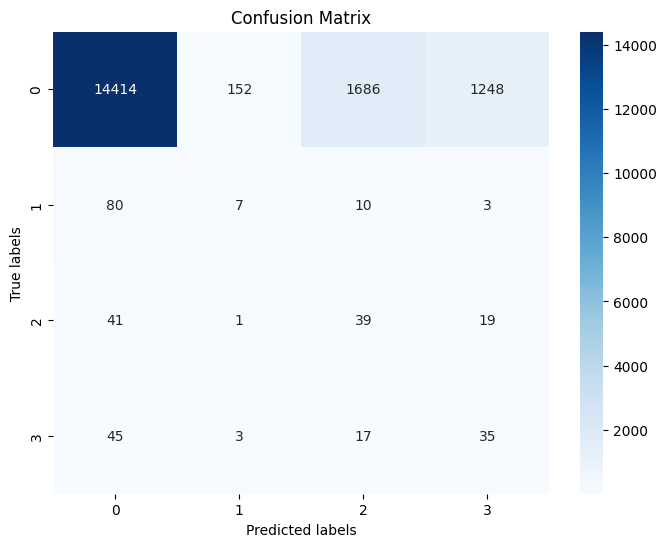

Accuracy: 0.8143
F1 Score (Weighted): 0.8843
F1 Score (Unweighted): 0.2609
F2 Score (Weighted): 0.8392
F2 Score (Unweighted): 0.2769


In [77]:
showResult(y_test, final_predictions)